In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pbp = pd.read_csv(f'pbp_data/play_by_play_2020.csv.gz', compression='gzip', low_memory=False)

In [3]:
dropbacks = pbp.loc[pbp.qb_dropback==1].copy()

In [4]:
dropbacks['ay_from_ez'] = dropbacks['yardline_100'] - dropbacks['air_yards']

In [5]:
endzone_throws = dropbacks.loc[dropbacks.ay_from_ez==0].copy()

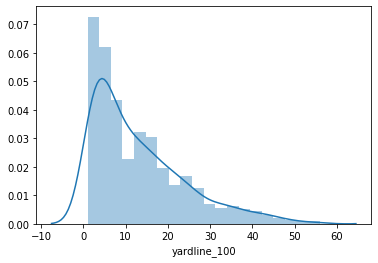

In [6]:
sns.distplot(endzone_throws['yardline_100'])

In [7]:
# https://gist.github.com/Deryck97/dff8d33e9f841568201a2a0d5519ac5e#team-colors
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

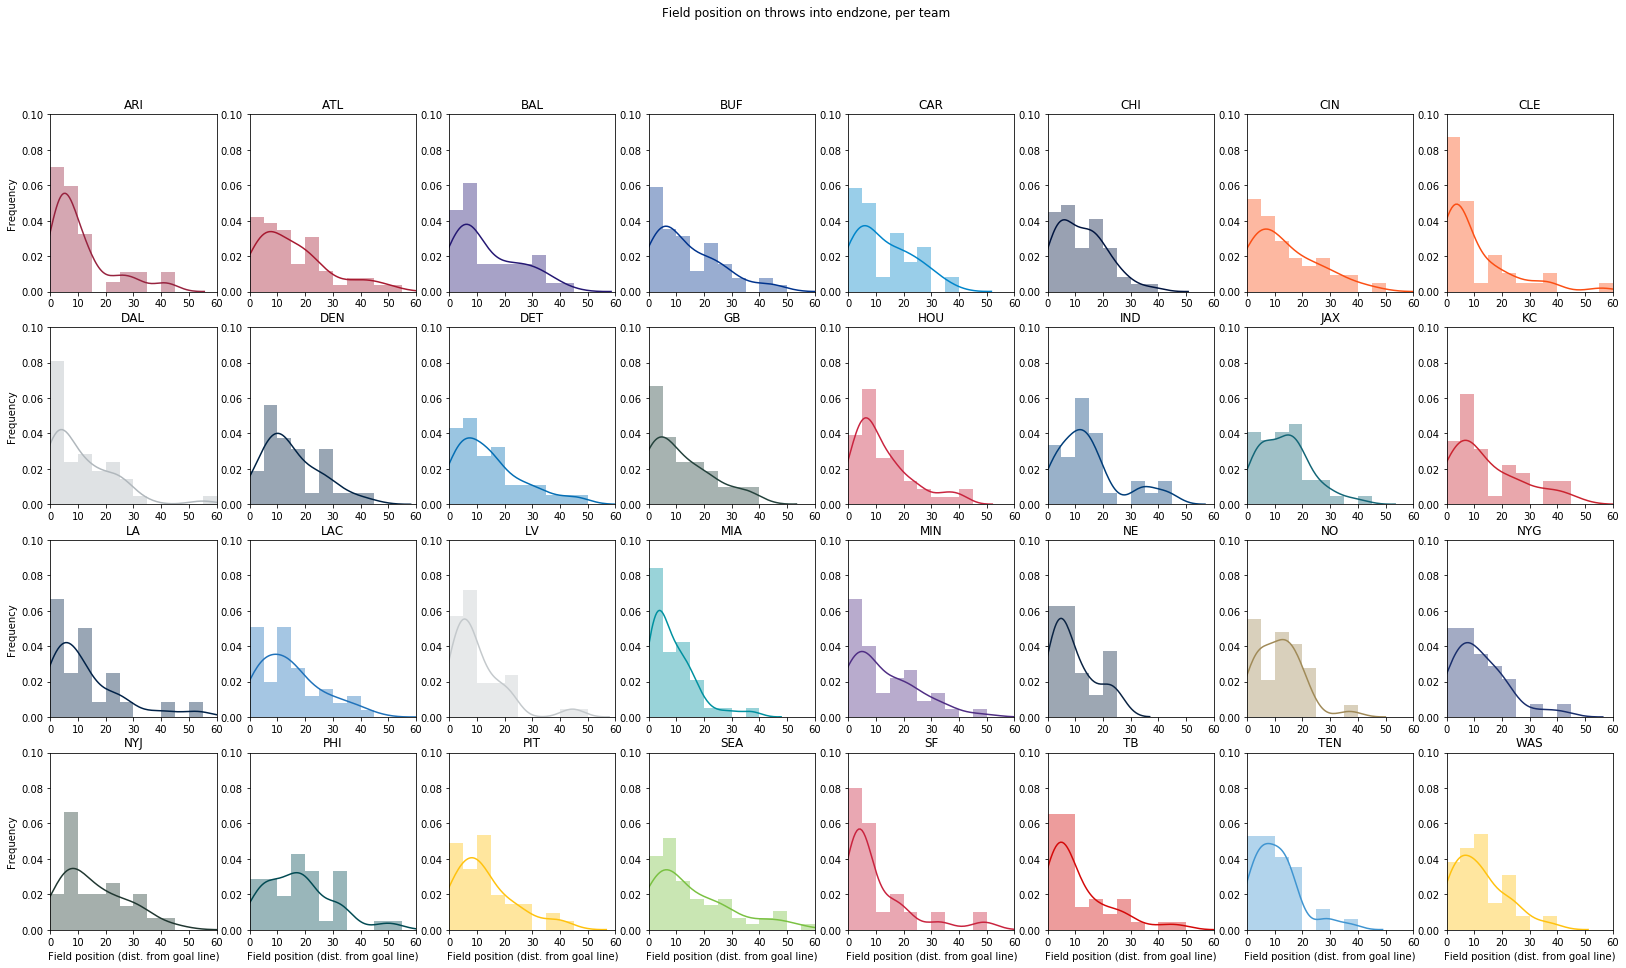

In [8]:
def plot_ayts(row, col, team):
    sns.distplot(endzone_throws.loc[(dropbacks.posteam==team), 'yardline_100'], bins=np.arange(0, 65, 5), color=COLORS[team], ax=axs[row][col])
    ax = axs[row][col]
    ax.set(title=team, xlabel="", xlim=(0,60), ylim=(0,.1))
    ax.xaxis.set_ticks(np.arange(0, 70, 10))
    ax.yaxis.set_ticks(np.arange(0, .12, .02))
    if col==0:
        ax.set(ylabel="Frequency")
    if row==3:
        ax.set(xlabel="Field position (dist. from goal line)")
fig, axs = plt.subplots(nrows=4, ncols=8)
teams = sorted(dropbacks.posteam.dropna().unique())
for row in range(4):
    for col in range(8):
        posteam = teams[row*8 + col]
        plot_ayts(row, col, posteam)
fig.suptitle("Field position on throws into endzone, per team")
fig.set_size_inches(28,15)
fig.savefig('endzone_throws_fieldpos.png')